<a href="https://colab.research.google.com/github/PedroEsch/Rede_MLP_Correcao_trajetoria_Hbot_or_CoreXY/blob/main/Treinamento_da_rede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

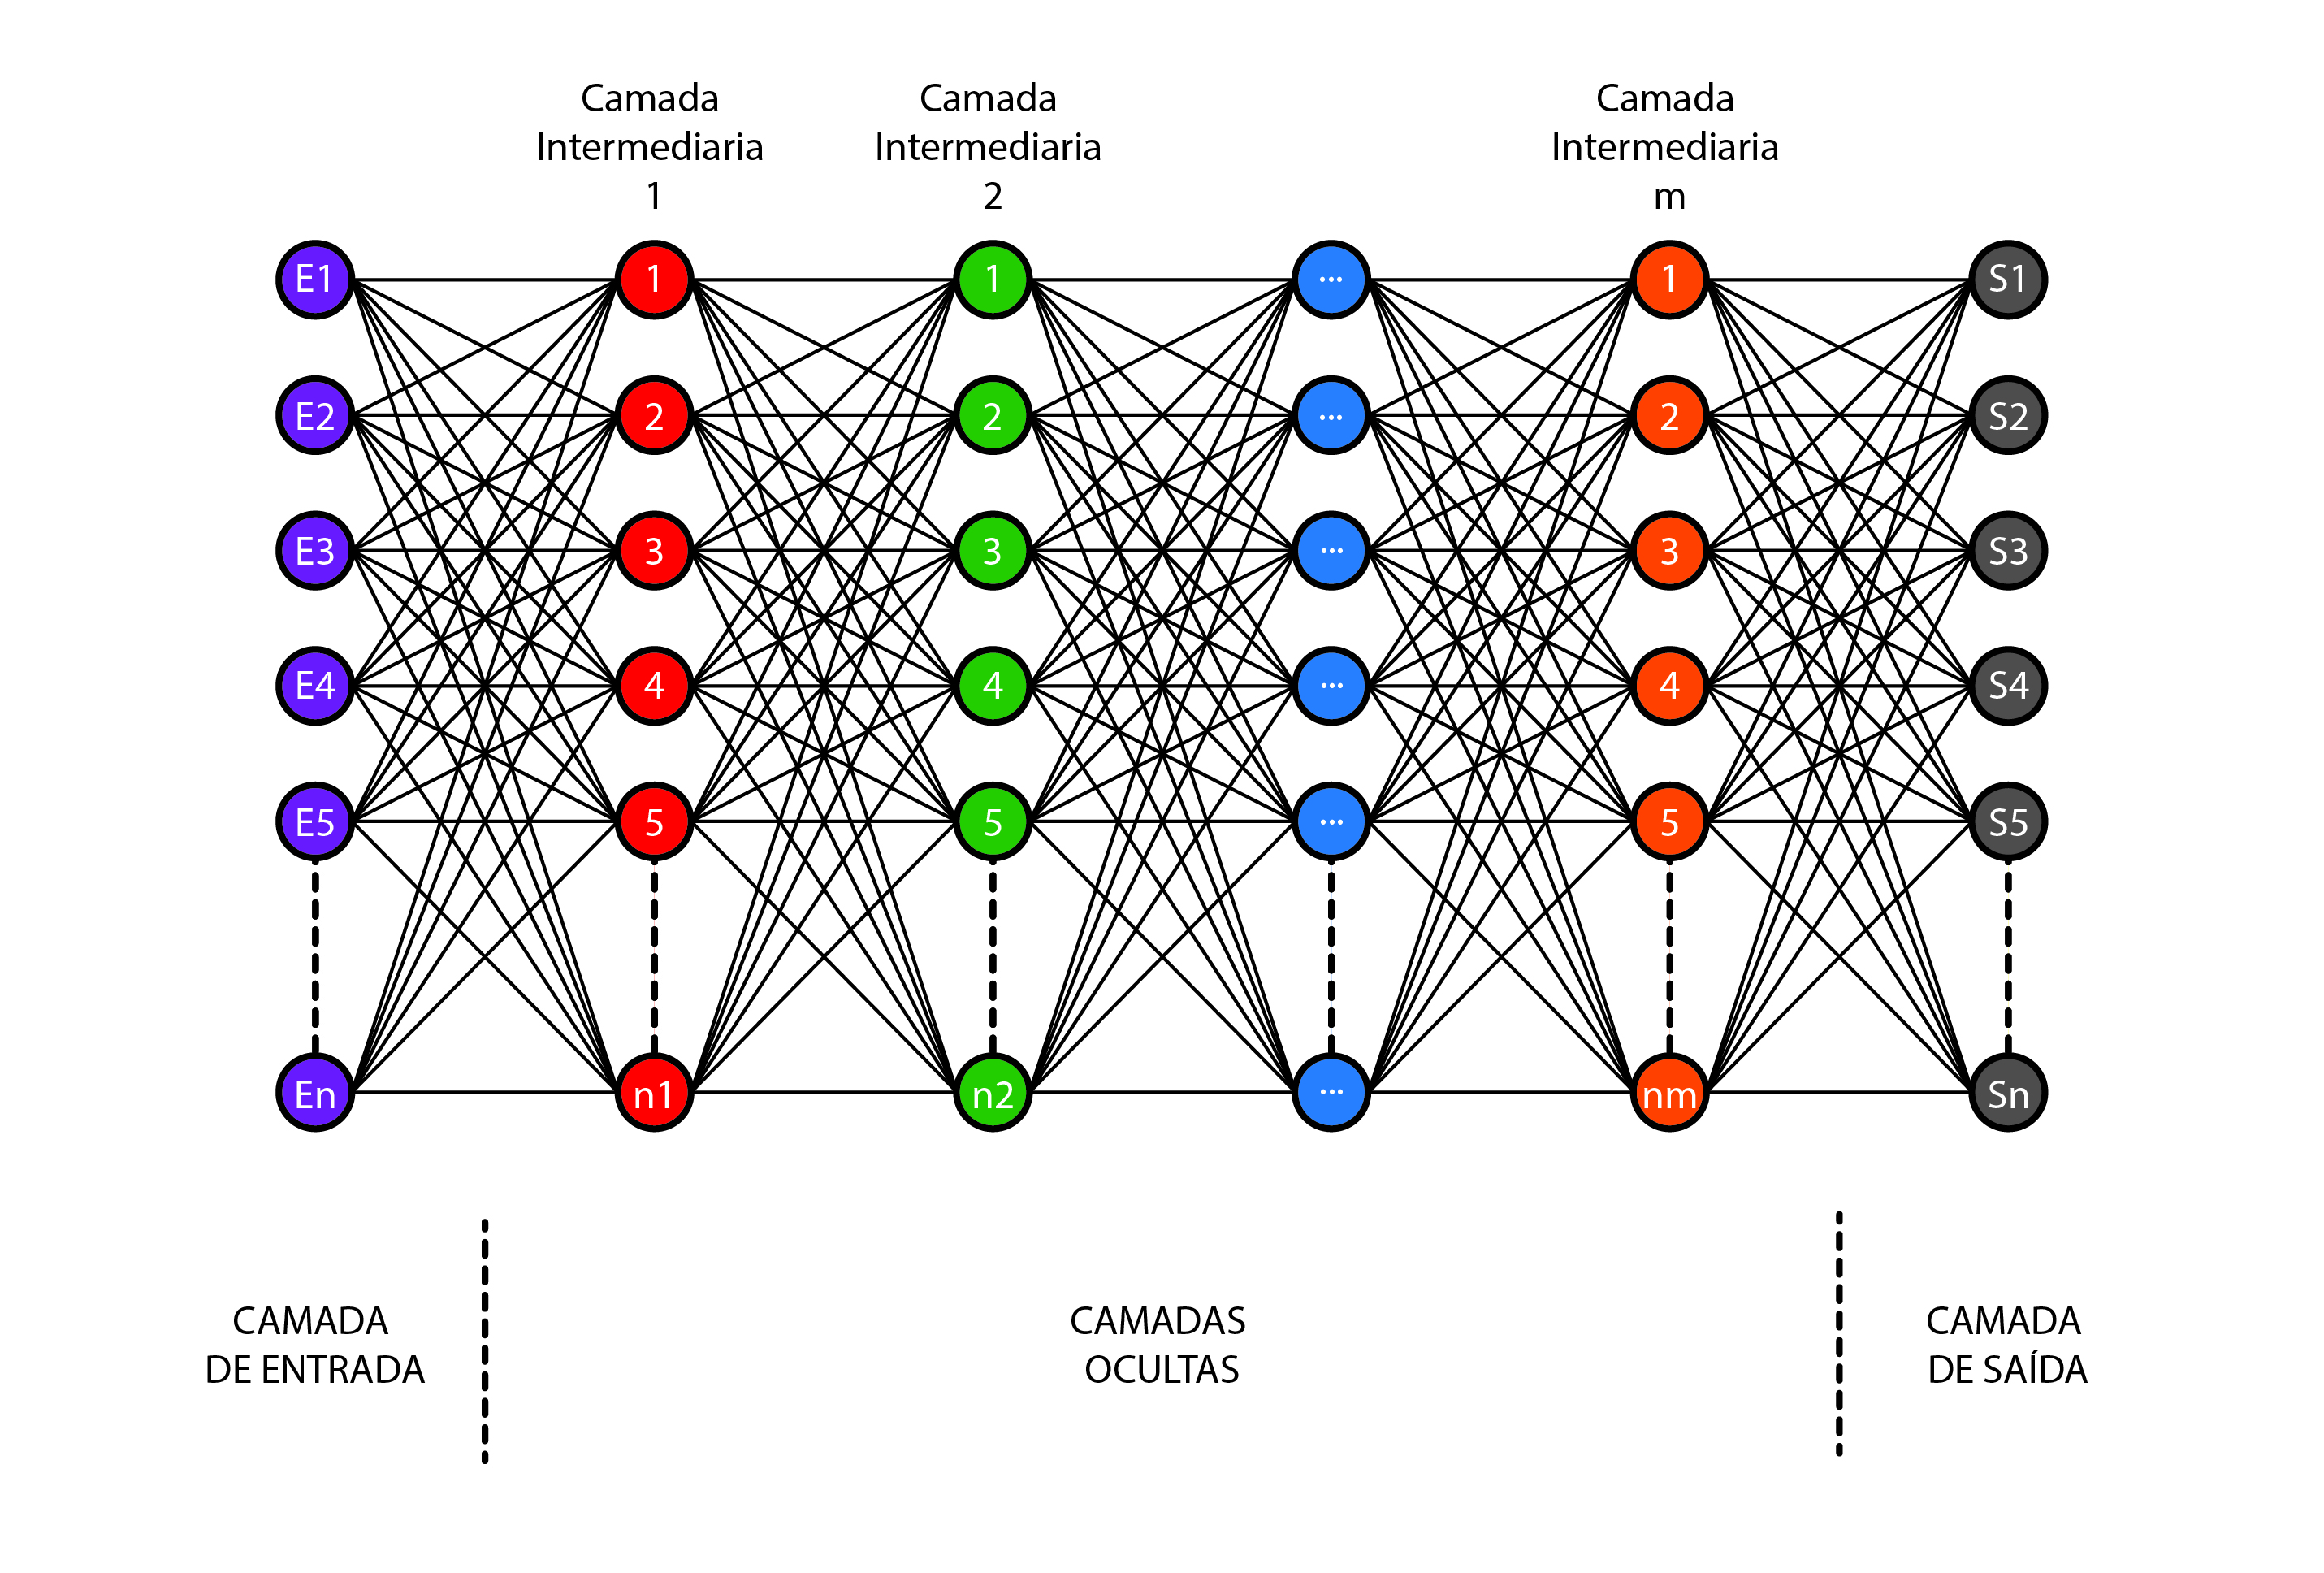

In [ ]:
#@title Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
from keras.layers import Dense, Activation
from keras.models import Sequential
from scipy.integrate import odeint
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Importando nuvem de dados

# Carregar o arquivo .npz do Google Drive
dados = np.load('/content/drive/My Drive/nuvem_de_pontos-k1e4-C5e-2-np10000.npz')

# Acessar os arrays dentro do arquivo .npz
matriz = dados['matriz']

print(len(matriz[:,0]))

10000


In [ ]:
#@title Separando parametros de entrada e saida para o treinamento

x = np.copy(matriz[:,0:4])
y = np.copy(matriz[:,4:6])

# Medidas padrão
X = 0.42
C = 0.02
Y = 0.46
R1 = 0.005
R2 = 0.005

# M
M = 0.004
M1 = 0.4
M2 = 0.18
M3 = M
M4 = M
M5 = M
M6 = M
M7 = M
M8 = M
M9 = M
M10 = M

# r
r = 0.012
r3 = r
r4 = r
r5 = r
r6 = r
r7 = r
r8 = r
r9 = r
r10 = r

# I
I = (1/2)*M*(r**2)
I3 = I
I4 = I
I5 = I
I6 = I
I7 = I
I8 = I
I9 = I
I10 = I

# K
k = 1e4
Kq110 = k
K7q1 = k
K3q2 = k
Kq26 = k
K13 = k
K14 = k
K45 = k
K57 = k
K68 = k
K89 = k
K91 = k
K101 = k

# C
c = 5e-2
C3 = c
C4 = c
C5 = c
C6 = c
C7 = c
C8 = c
C9 = c
C10 = c

In [ ]:
#@title Criando modelo da rede
rn.seed(1)
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2)) #activation (default) = linear

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])

In [ ]:
#@title treinando a rede
model.fit(x, y, epochs=4, batch_size=1, verbose=1)
model.fit(x, y, epochs=500, batch_size=500, verbose=1)
model.fit(x, y, epochs=500, batch_size=5000, verbose=1)
model.fit(x, y, epochs=500, batch_size=len(matriz[:,0]), verbose=1)
scores = model.evaluate(x, y, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/4
10000/10000 [==============================] - 22s 2ms/step - loss: 205.7084 - mean_squared_error: 205.7084
Epoch 2/4
10000/10000 [==============================] - 21s 2ms/step - loss: 3.2469 - mean_squared_error: 3.2469
Epoch 3/4
10000/10000 [==============================] - 22s 2ms/step - loss: 1.8731 - mean_squared_error: 1.8731
Epoch 4/4
10000/10000 [==============================] - 21s 2ms/step - loss: 1.5426 - mean_squared_error: 1.5426
Epoch 1/500
20/20 [==============================] - 1s 5ms/step - loss: 0.7560 - mean_squared_error: 0.7560
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5208 - mean_squared_error: 0.5208
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4962 - mean_squared_error: 0.4962
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4901 - mean_squared_error: 0.4901
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4849 - mean_squared_error: 0.

313/313 [==============================] - 1s 2ms/step


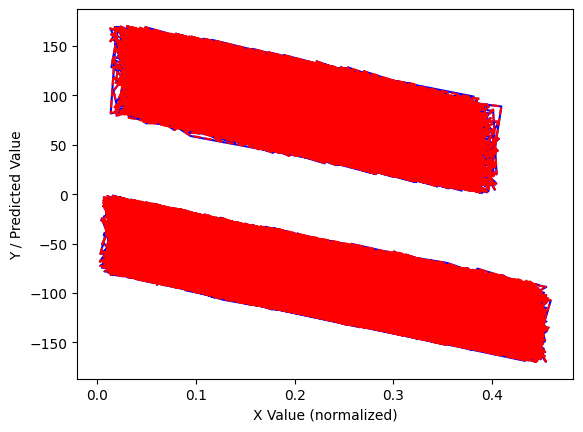

In [ ]:
#@title Verificando resultados
preds = model.predict(x)
plt.plot(x[:,2:4], y, 'b', x[:,2:4], preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value (normalized)')
plt.show()

In [ ]:
#@title Funções
def mse(real, previsto):
  real = np.array(real)
  previsto = np.array(previsto)
  media = np.zeros(len(previsto))
  for i in range(len(previsto)):
    media[i] = real[i]-previsto[i]
  return np.mean(abs(media))

# função que retorna dy/dt
def eq_lagrange(var,t):
  xint, yint, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10 = var[0], var[1], var[2], var[3], var[4], var[5], var[6], var[7], var[8], var[9]
  xintp, yintp, theta3p, theta4p, theta5p, theta6p, theta7p, theta8p, theta9p, theta10p = var[10], var[11], var[12], var[13], var[14], var[15], var[16], var[17], var[18], var[19]

  if (t<=tr):
    xd = xp_d*t + xd0
    yd = yp_d*t + yd0
  else:
    xd = xf
    yd = yf

  q1 = ((yd+X-(C/2)-xd)/R1 -q10)
  q2 = ((-yd-xd+(C/2))/R2 -q20)

  #0
  xintpp = -(
            - K14*(L14-xint-r4*theta4)
            + K101*(L101+xint-r10*theta10)
            - K13*(L13-xint+r3*theta3)
            + K91*(L91+xint+r9*theta9)
            )/M1
  #1
  yintpp =  -(
            + K45*(L45+yint+r4*theta4-r5*theta5)
            - Kq110*(Lq110-yint+r10*theta10+R1*q1)
            - K3q2*(L3q2-yint-r3*theta3-R2*q2)
            + K89*(L89+yint+r8*theta8-r9*theta9)
            )/(M1+M2+M3+M4+M9+M10)
  #2
  theta3pp = (-C3*theta3p
              - (
                  + K13*r3*(L13-xint+r3*theta3)
                  - K3q2*r3*(L3q2-yint-r3*theta3-R2*q2)
                )
              )/I3
  #3
  theta4pp = (-C4*theta4p
              - (
                  - K14*r4*(L14-xint-r4*theta4)
                  + K45*r4*(L45+yint+r4*theta4-r5*theta5)
                )
              )/I4
  #4
  theta5pp = (-C5*theta5p
              - (
                  - K45*r5*(L45+yint+r4*theta4-r5*theta5)
                  + K57*r5*(L+r5*theta5-r7*theta7)
                )
              )/I5
  #5
  theta6pp = (-C6*theta6p
              - (
                  - Kq26*r6*(L+R2*q2-r6*theta6)
                  + K68*r6*(L+r6*theta6-r8*theta8)
                )
              )/I6
  #6
  theta7pp = (-C7*theta7p
              - (
                  - K57*r7*(L+r5*theta5-r7*theta7)
                  + K7q1*r7*(L+r7*theta7-R1*q1)
                )
              )/I7
  #7
  theta8pp = (-C8*theta8p
              - (
                  - K68*r8*(L+r6*theta6-r8*theta8)
                  + K89*r8*(L89+yint+r8*theta8-r9*theta9)
                )
              )/I8
  #8
  theta9pp = (-C9*theta9p
              - (
                  - K89*r9*(L89+yint+r8*theta8-r9*theta9)
                  + K91*r9*(L91+xint+r9*theta9)
                )
              )/I9
  #9
  theta10pp = (-C10*theta10p
               - (
                  + Kq110*r10*(Lq110-yint+r10*theta10+R1*q1)
                  - K101*r10*(L101+xint-r10*theta10)
                  )
               )/I10

  varp = np.empty(20)
  varp[:10] = [xintp, yintp, theta3p, theta4p, theta5p, theta6p, theta7p, theta8p, theta9p, theta10p]
  varp[10:] = [xintpp, yintpp, theta3pp, theta4pp, theta5pp, theta6pp, theta7pp, theta8pp, theta9pp, theta10pp]
  return varp

In [ ]:
for i in  range(1):
  print(y[i,0],preds[i,0])
  print(y[i,1],preds[i,1])

116.15934181573736 116.27919
-142.25185347448578 -141.99658


In [ ]:
#@title Erro nos qs
print("Erro em q1: ",mse(y[:1,0],preds[:1,0]))
print("Erro em q2: ",mse(y[:1,1],preds[:1,1]))

Erro em q1:  0.11984824773919911
Erro em q2:  0.25527144323578455


In [ ]:
#@title Previsão de correção
x2 = np.zeros((len(matriz[:,0]),4))

x2[:,0:2], x2[:,2:4] = np.copy(matriz[:,0:2]), np.copy(matriz[:,6:8])

preds2 = model.predict(x2)

313/313 [==============================] - 0s 1ms/step


In [ ]:
#@title Calculado o resultado da previsão

xpred = np.zeros(len(preds2[:,0]))
ypred = np.zeros(len(preds2[:,0]))
xpred[:] = (X-R2*preds2[:,1]-R1*preds2[:,0])/2
ypred[:] = (-X+C-R2*preds2[:,1]+R1*preds2[:,0])/2

n2 = 100
coordenadas = np.zeros((n2,4))

for i in range(n2):
  # Condições iniciais
  xi = np.copy(matriz[i,0])
  yi = np.copy(matriz[i,1])
  var0 = np.zeros(20)
  var0[0] = xi
  var0[1] = yi

  # L
  L = 0
  Lq110 = yi
  L3q2 = yi
  L13 = xi
  L14 = xi
  L45 = -yi
  L89 = -yi
  L91 = -xi
  L101 = -xi

  # Condições finais
  xf = xpred[i]
  yf = ypred[i]

  # Tempo requerido, velocidade limite = 0.3 m/s
  xd0 = xi
  yd0 = yi
  d = ((xf-xi)**2+(yf-yi)**2)**(1/2)
  tr = d/0.3
  xp_d = (xf-xi)/tr
  yp_d = (yf-yi)/tr

  q10 = (yd0+X-(C/2)-xd0)/R1
  q20 = (-yd0-xd0+(C/2))/R2

  # Pontos temporais
  t = np.linspace(0,tr,1000)

  # Solução da ODE
  vart = odeint(eq_lagrange,var0,t)

  coordenadas[i,:] = np.array([matriz[i,6], matriz[i,7], vart[len(t)-1,0], vart[len(t)-1,1]])

In [ ]:
#@title Erro com a previsão
print("Erro em xint: ",mse(coordenadas[:,0],coordenadas[:,2]))
print("Erro em yint: ",mse(coordenadas[:,1],coordenadas[:,3]))

Erro em xint:  0.0009442948121321915
Erro em yint:  0.0006423433976958908


In [ ]:
#@title Erro sem a rede
print("Erro em xint: ",mse(matriz[:n2,6],matriz[:n2,2]))
print("Erro em yint: ",mse(matriz[:n2,7],matriz[:n2,3]))

Erro em xint:  0.015235332176200845
Erro em yint:  0.0070074880910189295


In [ ]:
#@title coordenadas inicial
print(matriz[0,0])
print(matriz[0,1])

0.2738747932348561
0.08330280351280382


In [ ]:
#@title coordenadas desejada
print(matriz[0,6])
print(matriz[0,7])

0.27523127914687107
0.44602798822555795


In [ ]:
#@title coordenadas reais
print(matriz[0,2])
print(matriz[0,3])

0.2751273997682689
0.4356113946720552


In [ ]:
#@title correção prevista
print(xpred[0])
print(ypred[0])

0.2743130326271057
0.4560484290122986


In [ ]:
#@title coordenadas reais da correção
print(coordenadas[0,2])
print(coordenadas[0,3])

0.27428037430409097
0.4456317697112776


In [ ]:
print(coordenadas)

[[0.27523128 0.44602799 0.27428037 0.44563177]
 [0.34500706 0.24321395 0.34560824 0.2435563 ]
 [0.39379887 0.16530635 0.39342571 0.16515022]
 [0.3090706  0.18292761 0.30935467 0.18195494]
 [0.2126869  0.42188573 0.21257664 0.42172688]
 [0.39034401 0.38566467 0.38988144 0.38685711]
 [0.19492454 0.02609065 0.19357923 0.02664924]
 [0.15069555 0.20953274 0.14909988 0.20935943]
 [0.22624659 0.39943285 0.22585537 0.39985305]
 [0.11024598 0.03195478 0.11179796 0.03103139]
 [0.37239057 0.42851552 0.36874366 0.43011862]
 [0.36787775 0.35610821 0.36784728 0.35644408]
 [0.35325857 0.18910222 0.35268483 0.18869036]
 [0.36866641 0.23151387 0.36793409 0.22987563]
 [0.01705238 0.13232441 0.01782292 0.13172161]
 [0.19049867 0.19581026 0.18975733 0.19542255]
 [0.11495351 0.15784969 0.11330091 0.15804668]
 [0.10625133 0.01429102 0.10677566 0.01382311]
 [0.06293448 0.3980512  0.06066957 0.39789947]
 [0.32633974 0.08543886 0.32616364 0.08391339]
 [0.04535963 0.22313124 0.04649075 0.22513289]
 [0.12999566 